In [ ]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_curve, auc

In [1]:
# Load Data
df = pd.read_csv(r"C:\Python\AI\Diabetes\diabetes1.csv")

NameError: name 'pd' is not defined

In [ ]:
# Cek kolom
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
X = df.drop(['Outcome'], axis=1)  # semua kolom kecuali 'Outcome' jadi fitur
y = df['Outcome']                 # kolom target

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [ ]:
# Model Naive Bayes
NBmodel = GaussianNB()
NBmodel.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Prediksi
y_pred = NBmodel.predict(X_test)
y_prob = NBmodel.predict_proba(X_test)[:, 1]

for i, (pred, prob) in enumerate(zip(y_pred, y_prob), 1):
    if i > 10:
        break
    status = "Terkena diabetes" if pred == 1 else "Tidak terkena diabetes"
    print(f"Data ke-{i}: {status} (Probabilitas: {prob:.2f})")

Data ke-1: Terkena diabetes (Probabilitas: 0.97)
Data ke-2: Terkena diabetes (Probabilitas: 0.89)
Data ke-3: Terkena diabetes (Probabilitas: 0.70)
Data ke-4: Tidak terkena diabetes (Probabilitas: 0.01)
Data ke-5: Tidak terkena diabetes (Probabilitas: 0.07)
Data ke-6: Terkena diabetes (Probabilitas: 0.79)
Data ke-7: Terkena diabetes (Probabilitas: 0.98)
Data ke-8: Tidak terkena diabetes (Probabilitas: 0.39)
Data ke-9: Terkena diabetes (Probabilitas: 0.68)
Data ke-10: Tidak terkena diabetes (Probabilitas: 0.14)


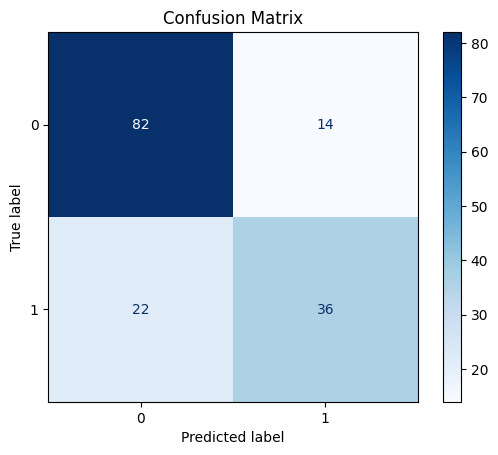

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=NBmodel.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82        96
           1       0.72      0.62      0.67        58

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.76       154



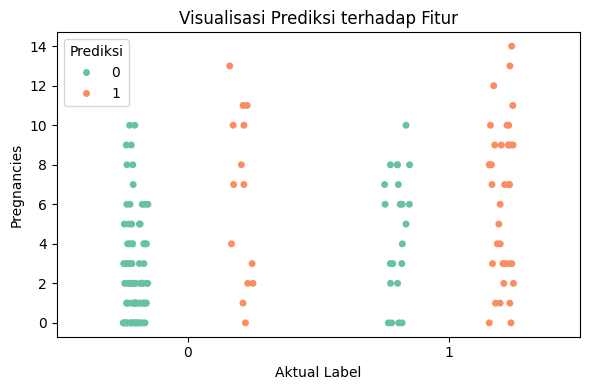

In [ ]:
# Visualisasi: Scatter Prediksi vs Aktual (2 fitur pertama)
plt.figure(figsize=(6, 4))
sns.stripplot(x=y_test, y=X_test.iloc[:, 0], hue=y_pred, dodge=True, palette='Set2')
plt.title("Visualisasi Prediksi terhadap Fitur")
plt.xlabel("Aktual Label")
plt.ylabel(X_test.columns[0])
plt.legend(title="Prediksi")
plt.tight_layout()
plt.show()

In [ ]:
# Visualisasi Tambahan: ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

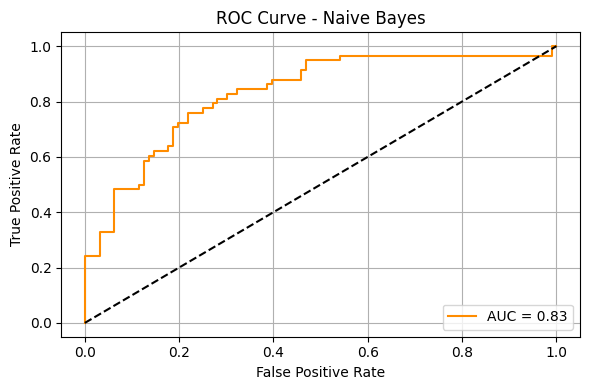

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--')  # garis diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Naive Bayes')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()